In [ ]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

In [ ]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/AI-Ethics/all_arxiv.csv')
data.head()

<ipython-input-3-5f4aa31aadcc>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drive/MyDrive/Colab Notebooks/AI-Ethics/all_arxiv.csv')


,Unnamed: 0,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0,812.3874,Jason Evans,"Jason L. Evans, David E. Morrissey, James D. W...",Vacuum Stability with Tachyonic Boundary Higgs...,"18 Pages, 5 Figures","Phys.Rev.D80:095011,2009",10.1103/PhysRevD.80.095011,NaN,hep-ph,http://arxiv.org/licenses/nonexclusive-distrib...,No-scale supersymmetry or gaugino mediation ...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2014-11-18,"[['Evans', 'Jason L.', ''], ['Morrissey', 'Dav..."
1,1,812.3875,Ashok Kumar,"Ashok Kumar, G. L. Sharma, and R. S. Katiyar R...",Magnetic control of large room-temperature pol...,"20 pages, 5 figures",NaN,NaN,NaN,cond-mat.mtrl-sci,http://arxiv.org/licenses/nonexclusive-distrib...,Numerous authors have referred to room-tempe...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2009-02-24,"[['Kumar', 'Ashok', ''], ['Sharma', 'G. L.', '..."
2,2,812.3876,R. N. Rogalyov,R.N. Rogalyov,One-Loop Diagrams in Lattice QCD with Wilson F...,"62 pages, 1 figure; reference [5] changed, Abs...",NaN,NaN,NaN,hep-lat,http://arxiv.org/licenses/nonexclusive-distrib...,A comprehensive number of integrals emerging...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2009-02-22,"[['Rogalyov', 'R. N.', '']]"
3,3,812.3877,Andriy Sanzhur,"A.G. Magner, A.I. Sanzhur, and A.M. Gzhebinsky",Asymmetry and Spin-Orbit Effects in Binding En...,Submitted to International Journal of Modern P...,"Int.J.Mod.Phys.E18:885-891,2009",10.1142/S0218301309013002,NaN,nucl-th,http://arxiv.org/licenses/nonexclusive-distrib...,Isoscalar and isovector particle densities a...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2009-05-29,"[['Magner', 'A. G.', ''], ['Sanzhur', 'A. I.',..."
4,4,812.3878,Cyrille Marquet,"Fabio Dominguez, Cyrille Marquet and Bin Wu",On multiple scatterings of mesons in hot and c...,"27 pages, 7 figures, discussions improved, ref...","Nucl.Phys.A823:99-119,2009",10.1016/j.nuclphysa.2009.03.008,NaN,nucl-th hep-ph,http://arxiv.org/licenses/nonexclusive-distrib...,We study the propagation of a color singlet ...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2010-04-28,"[['Dominguez', 'Fabio', ''], ['Marquet', 'Cyri..."


In [ ]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299802 entries, 0 to 2299801
Data columns (total 15 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Unnamed: 0      int64 
 1   id              object
 2   submitter       object
 3   authors         object
 4   title           object
 5   comments        object
 6   journal-ref     object
 7   doi             object
 8   report-no       object
 9   categories      object
 10  license         object
 11  abstract        object
 12  versions        object
 13  update_date     object
 14  authors_parsed  object
dtypes: int64(1), object(14)
memory usage: 4.7 GB


In [ ]:
df_arxiv = data.drop(data.columns[0], axis=1)
df_arxiv.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,812.3874,Jason Evans,"Jason L. Evans, David E. Morrissey, James D. W...",Vacuum Stability with Tachyonic Boundary Higgs...,"18 Pages, 5 Figures","Phys.Rev.D80:095011,2009",10.1103/PhysRevD.80.095011,NaN,hep-ph,http://arxiv.org/licenses/nonexclusive-distrib...,No-scale supersymmetry or gaugino mediation ...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2014-11-18,"[['Evans', 'Jason L.', ''], ['Morrissey', 'Dav..."
1,812.3875,Ashok Kumar,"Ashok Kumar, G. L. Sharma, and R. S. Katiyar R...",Magnetic control of large room-temperature pol...,"20 pages, 5 figures",NaN,NaN,NaN,cond-mat.mtrl-sci,http://arxiv.org/licenses/nonexclusive-distrib...,Numerous authors have referred to room-tempe...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2009-02-24,"[['Kumar', 'Ashok', ''], ['Sharma', 'G. L.', '..."
2,812.3876,R. N. Rogalyov,R.N. Rogalyov,One-Loop Diagrams in Lattice QCD with Wilson F...,"62 pages, 1 figure; reference [5] changed, Abs...",NaN,NaN,NaN,hep-lat,http://arxiv.org/licenses/nonexclusive-distrib...,A comprehensive number of integrals emerging...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2009-02-22,"[['Rogalyov', 'R. N.', '']]"
3,812.3877,Andriy Sanzhur,"A.G. Magner, A.I. Sanzhur, and A.M. Gzhebinsky",Asymmetry and Spin-Orbit Effects in Binding En...,Submitted to International Journal of Modern P...,"Int.J.Mod.Phys.E18:885-891,2009",10.1142/S0218301309013002,NaN,nucl-th,http://arxiv.org/licenses/nonexclusive-distrib...,Isoscalar and isovector particle densities a...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2009-05-29,"[['Magner', 'A. G.', ''], ['Sanzhur', 'A. I.',..."
4,812.3878,Cyrille Marquet,"Fabio Dominguez, Cyrille Marquet and Bin Wu",On multiple scatterings of mesons in hot and c...,"27 pages, 7 figures, discussions improved, ref...","Nucl.Phys.A823:99-119,2009",10.1016/j.nuclphysa.2009.03.008,NaN,nucl-th hep-ph,http://arxiv.org/licenses/nonexclusive-distrib...,We study the propagation of a color singlet ...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2010-04-28,"[['Dominguez', 'Fabio', ''], ['Marquet', 'Cyri..."


In [ ]:
# Turning the 'update_date' column into a datetime format column
df_arxiv['update_date'] = pd.to_datetime(df_arxiv['update_date'])
df_arxiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299802 entries, 0 to 2299801
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              object        
 1   submitter       object        
 2   authors         object        
 3   title           object        
 4   comments        object        
 5   journal-ref     object        
 6   doi             object        
 7   report-no       object        
 8   categories      object        
 9   license         object        
 10  abstract        object        
 11  versions        object        
 12  update_date     datetime64[ns]
 13  authors_parsed  object        
dtypes: datetime64[ns](1), object(13)
memory usage: 245.6+ MB


In [ ]:
arxiv_date_min = df_arxiv['update_date'].min().strftime('%Y-%m-%d')
arxiv_date_max = df_arxiv['update_date'].max().strftime('%Y-%m-%d')
print(f"The Arxiv Dataset includes papers from {arxiv_date_min} to {arxiv_date_max}")

The Arxiv Dataset includes papers from 2007-05-23 to 2024-01-12


## Papers (10 years)

In [ ]:
arxiv_10years_df = df_arxiv[
    (df_arxiv['update_date'].dt.year >= 2013) & (df_arxiv['update_date'].dt.year <= 2023)
].copy()

arxiv_10years_df = arxiv_10years_df.reset_index(drop=True)
arxiv_10years_df.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,812.3874,Jason Evans,"Jason L. Evans, David E. Morrissey, James D. W...",Vacuum Stability with Tachyonic Boundary Higgs...,"18 Pages, 5 Figures","Phys.Rev.D80:095011,2009",10.1103/PhysRevD.80.095011,NaN,hep-ph,http://arxiv.org/licenses/nonexclusive-distrib...,No-scale supersymmetry or gaugino mediation ...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2014-11-18,"[['Evans', 'Jason L.', ''], ['Morrissey', 'Dav..."
1,812.3885,Ke Han,Ke Han (for the LSSS Collaboration),Search for Stable Strange Quark Matter in Luna...,Talk given at International Conference on Stra...,"J.Phys.G36:064048,2009",10.1088/0954-3899/36/6/064048,NaN,nucl-ex,http://arxiv.org/licenses/nonexclusive-distrib...,Strange quark matter is a postulated state w...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2019-08-13,"[['Han', 'Ke', '', 'for the LSSS Collaboration']]"
2,812.3889,Rachele Dominguez,"Rachele Dominguez, Kipton Barros, W. Klein",Early time kinetics of systems with spatial sy...,"15 pages, 22 figures",NaN,10.1103/PhysRevE.79.041121,NaN,cond-mat.stat-mech cond-mat.mtrl-sci,http://arxiv.org/licenses/nonexclusive-distrib...,In this paper we present a study of the earl...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2013-05-29,"[['Dominguez', 'Rachele', ''], ['Barros', 'Kip..."


In [ ]:
print(f"The Arxiv Dataset contains {len(arxiv_10years_df)} papers from January 2013 to 2023")

The Arxiv Dataset contains 1757884 papers from January 2013 to 2023


In [ ]:
ai_list =['stat.ML','cs.LG','cs.AI','cs.CY','cs.CL']

ai_arxiv_10years_df = arxiv_10years_df[arxiv_10years_df.categories.isin(ai_list)]
ai_arxiv_10years_df = ai_arxiv_10years_df.reset_index(drop=True)
print(f"Number of papers from the past 10 years: {len(arxiv_10years_df)} \nNumber of AI-Related papers from the past 10 years: {len(ai_arxiv_10years_df)}")

Number of papers from the past 10 years: 1757884 
Number of AI-Related papers from the past 10 years: 49148


In [ ]:
# select articles contained in title or in abstract 'ethic & AI'

ai_ethics_10years = ai_arxiv_10years_df[ai_arxiv_10years_df['title'].str.contains('AI', case = False) | (ai_arxiv_10years_df['title'].str.contains('Artificial Intelligence', case = False)) &
                             ai_arxiv_10years_df['abstract'].str.contains(r'\bethic', case = False, regex = True) ]
ai_ethics_10years

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
27,1002.3684,Vicente Zarzoso,"Vicente Zarzoso, Pierre Comon",Robust Independent Component Analysis by Itera...,NaN,"IEEE Transactions on Neural Networks 21, 2 (20...",10.1109/TNN.2009.2035920,NaN,stat.ML,http://arxiv.org/licenses/nonexclusive-distrib...,Independent component analysis (ICA) aims at...,"[{'version': 'v1', 'created': 'Fri, 19 Feb 201...",2016-11-15,"[['Zarzoso', 'Vicente', ''], ['Comon', 'Pierre..."
37,1005.0928,Antti Airola,"Antti Airola, Tapio Pahikkala, Tapio Salakoski",Training linear ranking SVMs in linearithmic t...,"20 pages, 4 figures",Pattern Recognit. Lett. 32(9): 1328-1336 (2011),10.1016/j.patrec.2011.03.014,NaN,stat.ML,http://arxiv.org/licenses/nonexclusive-distrib...,We introduce an efficient method for trainin...,"[{'version': 'v1', 'created': 'Thu, 6 May 2010...",2022-02-07,"[['Airola', 'Antti', ''], ['Pahikkala', 'Tapio..."
38,1005.1518,Liane Gabora,Liane Gabora,Recognizability of Individual Creative Style W...,"6 pages, submitted to Annual Meeting of the Co...","In S. Ohlsson & R. Catrambone (Eds.), Proceedi...",NaN,NaN,cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,It is hypothesized that creativity arises fr...,"[{'version': 'v1', 'created': 'Mon, 10 May 201...",2019-07-11,"[['Gabora', 'Liane', '']]"
60,1011.0187,Sahin Emrah Amrahov,"\c{S}ahin Emrah Amrahov, Orhan A. Nooraden",A Distributed AI Aided 3D Domino Game,NaN,NaN,NaN,NaN,cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,In the article a turn-based game played on f...,"[{'version': 'v1', 'created': 'Sun, 31 Oct 201...",2015-03-17,"[['Amrahov', 'Şahin Emrah', ''], ['Nooraden', ..."
67,1012.1635,Adrian Paschke,He Tan,A study on the relation between linguistics-or...,"in Adrian Paschke, Albert Burger, Andrea Splen...",NaN,NaN,SWAT4LS 2010,cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,In this paper we dealt with the comparison a...,"[{'version': 'v1', 'created': 'Tue, 7 Dec 2010...",2015-03-17,"[['Tan', 'He', '']]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49101,cs/9412101,NaN,"S. Soderland, Lehnert. W",Wrap-Up: a Trainable Discourse Module for Info...,See http://www.jair.org/ for any accompanying ...,"Journal of Artificial Intelligence Research, V...",NaN,NaN,cs.AI,NaN,The vast amounts of on-line text now availab...,"[{'version': 'v1', 'created': 'Thu, 1 Dec 1994...",2014-11-17,"[['Soderland', 'S.', ''], ['W', 'Lehnert.', '']]"
49104,cs/9501102,NaN,"S. Hanks, D. S. Weld",A Domain-Independent Algorithm for Plan Adapta...,See http://www.jair.org/ for any accompanying ...,"Journal of Artificial Intelligence Research, V...",NaN,NaN,cs.AI,NaN,"The paradigms of transformational planning, ...","[{'version': 'v1', 'created': 'Sun, 1 Jan 1995...",2014-11-17,"[['Hanks', 'S.', ''], ['Weld', 'D. S.', '']]"
49130,cs/9610101,NaN,"G. Zlotkin, J. S. Rosenschein",Mechanisms for Automated Negotiation in State ...,See http://www.jair.org/ for any accompanying ...,"Journal of Artificial Intelligence Research, V...",NaN,NaN,cs.AI,NaN,This paper lays part of the groundwork for a...,"[{'version': 'v1', 'created': 'Tue, 1 Oct 1996...",2014-11-17,"[['Zlotkin', 'G.', ''], ['Rosenschein', 'J. S...."
49132,cs/9611101,NaN,"R. A Helzerman, M. P. Harper",MUSE CSP: An Extension to the Constraint Satis...,See http://www.jair.org/ for any accompanying ...,"Journal of Artificial Intelligence Research, V...",NaN,NaN,cs.AI,NaN,This paper describes an extension to the con...,"[{'version': 'v1', 'created': 'Fri, 1 Nov 1996...",2014-11-17,"[['Helzerman', 'R. A', ''], ['Harper', 'M. P.'..."


 Compare AI-Related and AI-Ethics papers

In [ ]:
print(f"Number of AI-related papers from the past 10 years: {len(ai_arxiv_10years_df)} \nNumber of AI-Ethics papers from the past 10 years: {len(ai_ethics_10years)}")

Number of AI-related papers from the past 10 years: 49148 
Number of AI-Ethics papers from the past 10 years: 7848


<ipython-input-11-9301d316a12e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette="husl")


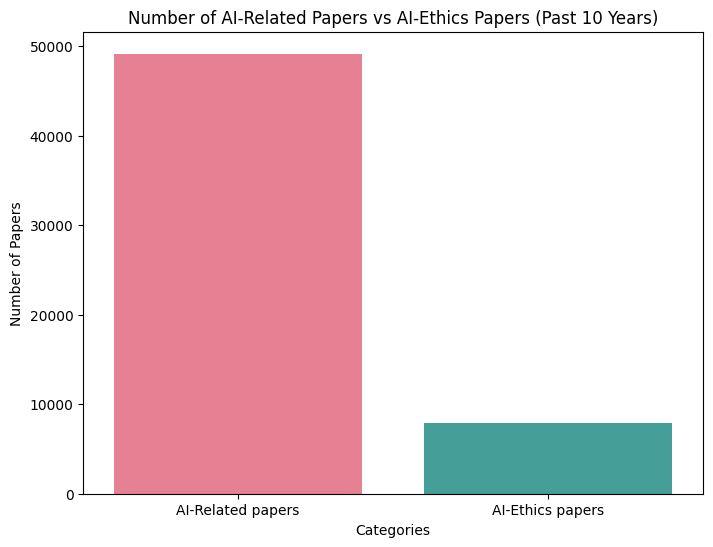

In [ ]:
# Data
categories = ['AI-Related papers', 'AI-Ethics papers']
counts = [len(ai_arxiv_10years_df), len(ai_ethics_10years)]

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=counts, palette="husl")
plt.title('Number of AI-Related Papers vs AI-Ethics Papers (Past 10 Years)')
plt.xlabel('Categories')
plt.ylabel('Number of Papers')
plt.show()

AI-Related papers per years

<ipython-input-25-db3fb1ddea70>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=ai_arxiv_10years_df['update_date'].dt.year, palette="husl", order=years_order)


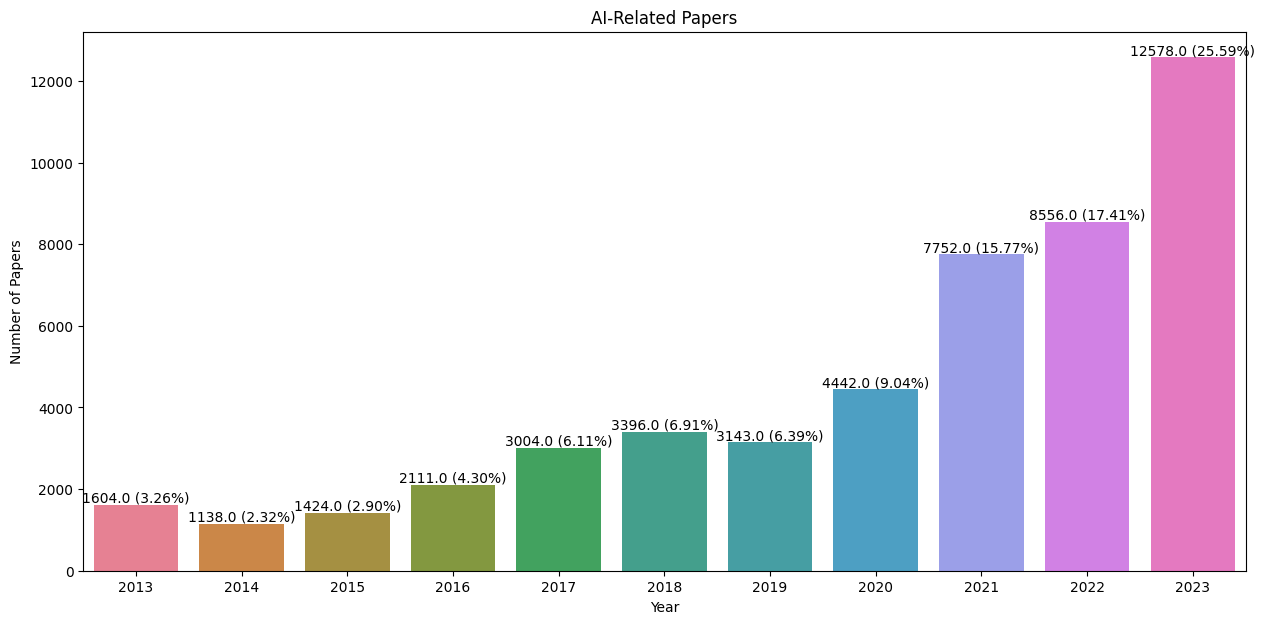

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Determine the order of years in ascending order
years_order = sorted(ai_arxiv_10years_df['update_date'].dt.year.unique())

# Create the countplot
ax = sns.countplot(x=ai_arxiv_10years_df['update_date'].dt.year, palette="husl", order=years_order)

# Calculate absolute values for each category
abs_values = ai_arxiv_10years_df['update_date'].dt.year.value_counts(ascending=False)

# Loop through the bars and add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(ai_arxiv_10years_df) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the legend
plt.title('AI-Related Papers')
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

AI-Ethics papers per years

<ipython-input-26-79166bbe90d1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=ai_ethics_10years['update_date'].dt.year, palette="husl", order=years_order)


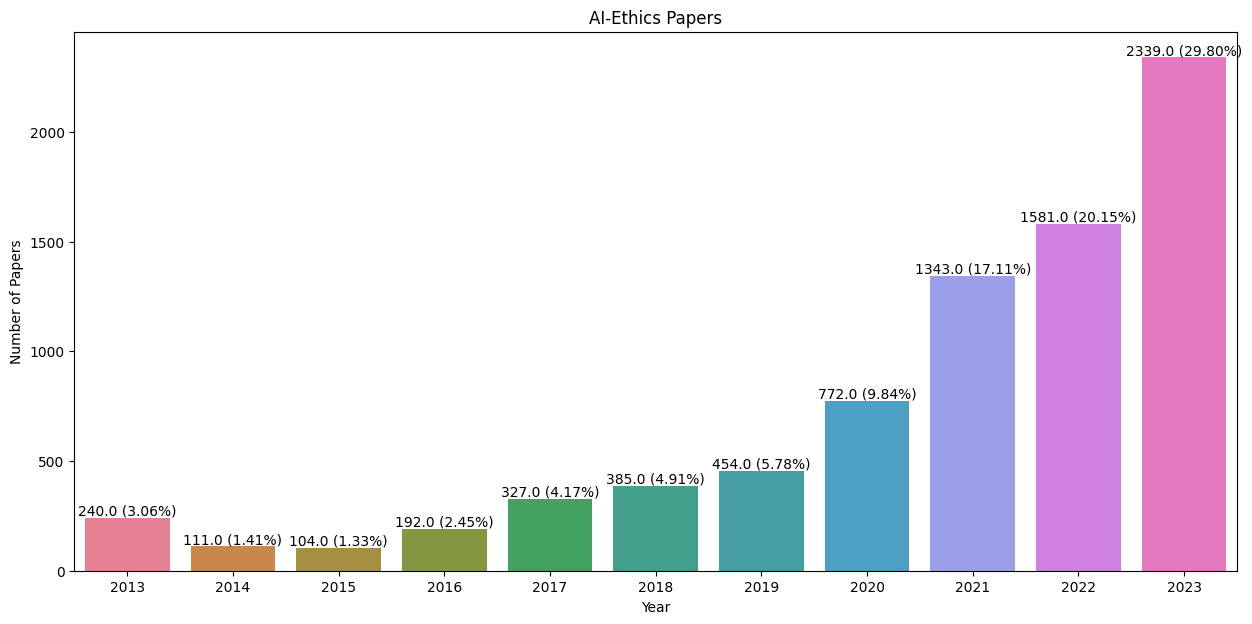

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Determine the order of years in ascending order
years_order = sorted(ai_ethics_10years['update_date'].dt.year.unique())

# Create the countplot
ax = sns.countplot(x=ai_ethics_10years['update_date'].dt.year, palette="husl", order=years_order)

# Calculate absolute values for each category
abs_values = ai_ethics_10years['update_date'].dt.year.value_counts(ascending=False)

# Loop through the bars and add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(ai_ethics_10years) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the legend
plt.title('AI-Ethics Papers')
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

## Papers (5 years)

In [ ]:
arxiv_5years_df = df_arxiv[
    (df_arxiv['update_date'].dt.year >= 2019) & (df_arxiv['update_date'].dt.year <= 2023)
].copy()

arxiv_5years_df = arxiv_5years_df.reset_index(drop=True)
arxiv_5years_df.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,812.3885,Ke Han,Ke Han (for the LSSS Collaboration),Search for Stable Strange Quark Matter in Luna...,Talk given at International Conference on Stra...,"J.Phys.G36:064048,2009",10.1088/0954-3899/36/6/064048,NaN,nucl-ex,http://arxiv.org/licenses/nonexclusive-distrib...,Strange quark matter is a postulated state w...,"[{'version': 'v1', 'created': 'Fri, 19 Dec 200...",2019-08-13,"[['Han', 'Ke', '', 'for the LSSS Collaboration']]"
1,812.3979,Jianming Qian,Jianming Qian (for the CDF and DZERO Collabora...,Higgs Searches at the Fermilab Tevatron ppbar ...,"8 pages, 5 figures, proceeding of the ""Physics...","PoS 2008LHC:005,2008",NaN,NaN,hep-ex,http://arxiv.org/licenses/nonexclusive-distrib...,Searching for and potential discovery of Hig...,"[{'version': 'v1', 'created': 'Sat, 20 Dec 200...",2019-08-14,"[['Qian', 'Jianming', '', 'for the CDF and DZE..."
2,812.3981,Albrecht Karle,Albrecht Karle (for the IceCube Collaboration),IceCube: Construction Status and First Results,"8 pages, 10 figures, to appear in the proceedi...","Nucl.Instrum.Meth.A604:S46-S52,2009",10.1016/j.nima.2009.03.180,NaN,astro-ph,http://arxiv.org/licenses/nonexclusive-distrib...,IceCube is a 1 km3 neutrino telescope curren...,"[{'version': 'v1', 'created': 'Sat, 20 Dec 200...",2019-08-13,"[['Karle', 'Albrecht', '', 'for the IceCube Co..."


In [ ]:
print(f"The Arxiv Dataset contains {len(arxiv_5years_df)} papers from January 2019 to 2023")

The Arxiv Dataset contains 1000699 papers from January 2019 to 2023


In [ ]:
arxiv_5years_df['categories'].value_counts().head(10)

cs.CV                39150
quant-ph             21536
cs.CL                16831
math.AP              15636
astro-ph.GA          13532
cond-mat.mtrl-sci    13398
math.CO              13021
cs.LG                12375
hep-ph               12060
cs.LG stat.ML        11040
Name: categories, dtype: int64

In [ ]:
print(f"The Arxiv Dataset has {arxiv_5years_df['categories'].nunique()} unique categories")

The Arxiv Dataset has 51739 unique categories


The number of articles has drastically decreased, but still there are articles in this set that have nothing to do with AI, ML, etc. In order to select only topics of interest to us, you can use arXiv Category Taxonomy.

*   Artificial Intelligence(cs.AI)
*   Machine Learning(cs.LG)
*   Machine Learning (stat.ML)
*   Computation and Language(cs.CL)
*   Computers and Society(cs.CY)

In [ ]:
ai_list =['stat.ML','cs.LG','cs.AI','cs.CY','cs.CL']

ai_arxiv_5years_df = arxiv_5years_df[arxiv_5years_df.categories.isin(ai_list)]
ai_arxiv_5years_df = ai_arxiv_5years_df.reset_index(drop=True)
print(f"Number of papers from the past 5 years: {len(arxiv_5years_df)} \nNumber of AI-Related papers from the past 5 years: {len(ai_arxiv_5years_df)}")

Number of papers from the past 5 years: 1000699 
Number of AI-Related papers from the past 5 years: 36471


In [ ]:
# select articles contained in title or in abstract 'ethic & AI'

ai_ethics = ai_arxiv_5years_df[ai_arxiv_5years_df['title'].str.contains('AI', case = False) | (ai_arxiv_5years_df['title'].str.contains('Artificial Intelligence', case = False)) &
                             ai_arxiv_5years_df['abstract'].str.contains(r'\bethic', case = False, regex = True) ]
ai_ethics

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
1,1005.0928,Antti Airola,"Antti Airola, Tapio Pahikkala, Tapio Salakoski",Training linear ranking SVMs in linearithmic t...,"20 pages, 4 figures",Pattern Recognit. Lett. 32(9): 1328-1336 (2011),10.1016/j.patrec.2011.03.014,NaN,stat.ML,http://arxiv.org/licenses/nonexclusive-distrib...,We introduce an efficient method for trainin...,"[{'version': 'v1', 'created': 'Thu, 6 May 2010...",2022-02-07,"[['Airola', 'Antti', ''], ['Pahikkala', 'Tapio..."
2,1005.1518,Liane Gabora,Liane Gabora,Recognizability of Individual Creative Style W...,"6 pages, submitted to Annual Meeting of the Co...","In S. Ohlsson & R. Catrambone (Eds.), Proceedi...",NaN,NaN,cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,It is hypothesized that creativity arises fr...,"[{'version': 'v1', 'created': 'Mon, 10 May 201...",2019-07-11,"[['Gabora', 'Liane', '']]"
7,1110.2212,F. Rossi,"F. Rossi, K. B. Venable, N. Yorke-Smith",Uncertainty in Soft Temporal Constraint Proble...,NaN,"Journal Of Artificial Intelligence Research, V...",10.1613/jair.2135,NaN,cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,"In real-life temporal scenarios, uncertainty...","[{'version': 'v1', 'created': 'Mon, 10 Oct 201...",2021-04-12,"[['Rossi', 'F.', ''], ['Venable', 'K. B.', '']..."
18,1210.7154,Patrick Lambrix,"Patrick Lambrix, Zlatan Dragisic, Valentina Iv...",Get my pizza right: Repairing missing is-a rel...,NaN,NaN,10.1007/978-3-642-37996-3_2,NaN,cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,With the increased use of ontologies in sema...,"[{'version': 'v1', 'created': 'Fri, 26 Oct 201...",2023-11-13,"[['Lambrix', 'Patrick', ''], ['Dragisic', 'Zla..."
22,1302.4957,David Heckerman,"David Heckerman, Dan Geiger",Learning Bayesian Networks: A Unification for ...,This version has improved pointers to the lite...,NaN,NaN,UAI-P-1995-PG-274-284,cs.AI,http://creativecommons.org/licenses/by/4.0/,We examine Bayesian methods for learning Bay...,"[{'version': 'v1', 'created': 'Wed, 20 Feb 201...",2021-07-01,"[['Heckerman', 'David', ''], ['Geiger', 'Dan',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36412,2312.15696,Shirong Ma,"Shirong Ma, Shen Huang, Shulin Huang, Xiaobin ...",EcomGPT-CT: Continual Pre-training of E-commer...,NaN,NaN,NaN,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,Large Language Models (LLMs) pre-trained on ...,"[{'version': 'v1', 'created': 'Mon, 25 Dec 202...",2023-12-27,"[['Ma', 'Shirong', ''], ['Huang', 'Shen', ''],..."
36417,2312.15813,Edward Raff,"Tirth Patel, Fred Lu, Edward Raff, Charles Nic...",Small Effect Sizes in Malware Detection? Make ...,To appear in Conference on Applied Machine Lea...,NaN,NaN,NaN,cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,Industry practitioners care about small impr...,"[{'version': 'v1', 'created': 'Mon, 25 Dec 202...",2023-12-27,"[['Patel', 'Tirth', ''], ['Lu', 'Fred', ''], [..."
36420,2312.15864,Yingkai Xiao,"Yingkai Xiao, Jingjin Liu, Hankz Hankui Zhuo",BalMCTS: Balancing Objective Function and Sear...,NaN,NaN,NaN,NaN,cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,Constraint Optimization Problems (COP) pose ...,"[{'version': 'v1', 'created': 'Tue, 26 Dec 202...",2023-12-27,"[['Xiao', 'Yingkai', ''], ['Liu', 'Jingjin', '..."
36429,2312.16054,Liwen Jing,"Bowen Zhang, Daijun Ding, Liwen Jing and Hu Huang",A Logically Consistent Chain-of-Thought Approa...,NaN,NaN,NaN,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,Zero-shot stance detection (ZSSD) aims to de...,"[{'version': 'v1', 'created': 'Tue, 26 Dec 202...",2023-12-27,"[['Zhang', 'Bowen', ''], ['Ding', 'Daijun', ''..."


In [ ]:
print(f"Number of AI-related papers from the past 5 years: {len(ai_arxiv_5years_df)} \nNumber of AI-Ethics papers from the past 5 years: {len(ai_ethics)}")

Number of AI-related papers from the past 5 years: 36471 
Number of AI-Ethics papers from the past 5 years: 6489


<ipython-input-19-a43a645eb6df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette="husl")


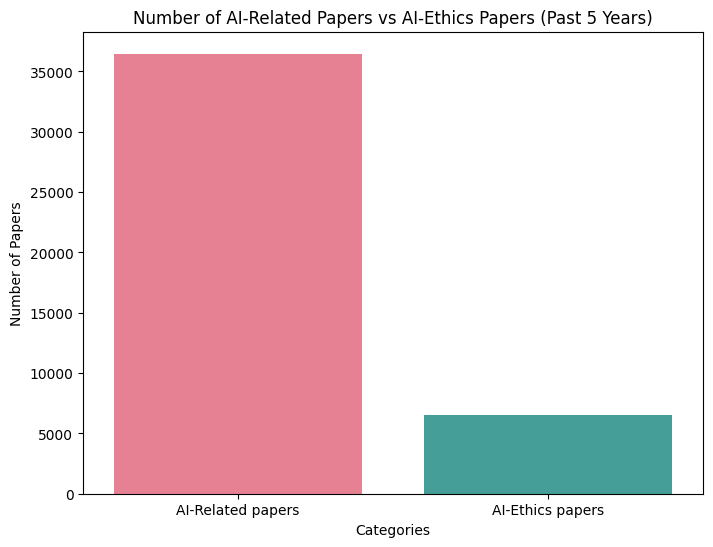

In [ ]:
# Data
categories = ['AI-Related papers', 'AI-Ethics papers']
counts = [len(ai_arxiv_5years_df), len(ai_ethics)]

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=counts, palette="husl")
plt.title('Number of AI-Related Papers vs AI-Ethics Papers (Past 5 Years)')
plt.xlabel('Categories')
plt.ylabel('Number of Papers')
plt.show()

<ipython-input-38-ded7e5aff631>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=ai_arxiv_5years_df['update_date'].dt.year, palette="husl", order=ai_arxiv_5years_df['update_date'].dt.year.value_counts(ascending=True).index)


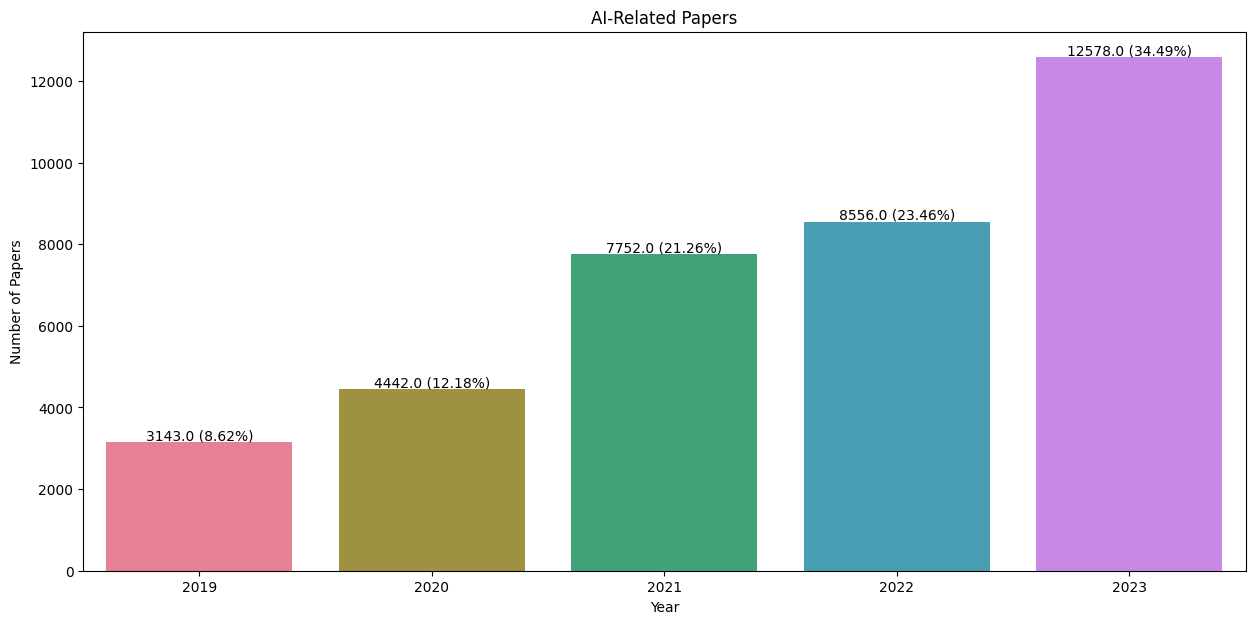

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Create the countplot
ax = sns.countplot(x=ai_arxiv_5years_df['update_date'].dt.year, palette="husl", order=ai_arxiv_5years_df['update_date'].dt.year.value_counts(ascending=True).index)

# Calculate absolute values for each category
abs_values = ai_arxiv_5years_df['update_date'].dt.year.value_counts(ascending=False)

# Loop through the bars and add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(ai_arxiv_5years_df) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the legend
plt.title('AI-Related Papers')
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

<ipython-input-39-8eec197a05d4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=ai_ethics['update_date'].dt.year, palette="husl", order=ai_ethics['update_date'].dt.year.value_counts(ascending=True).index)


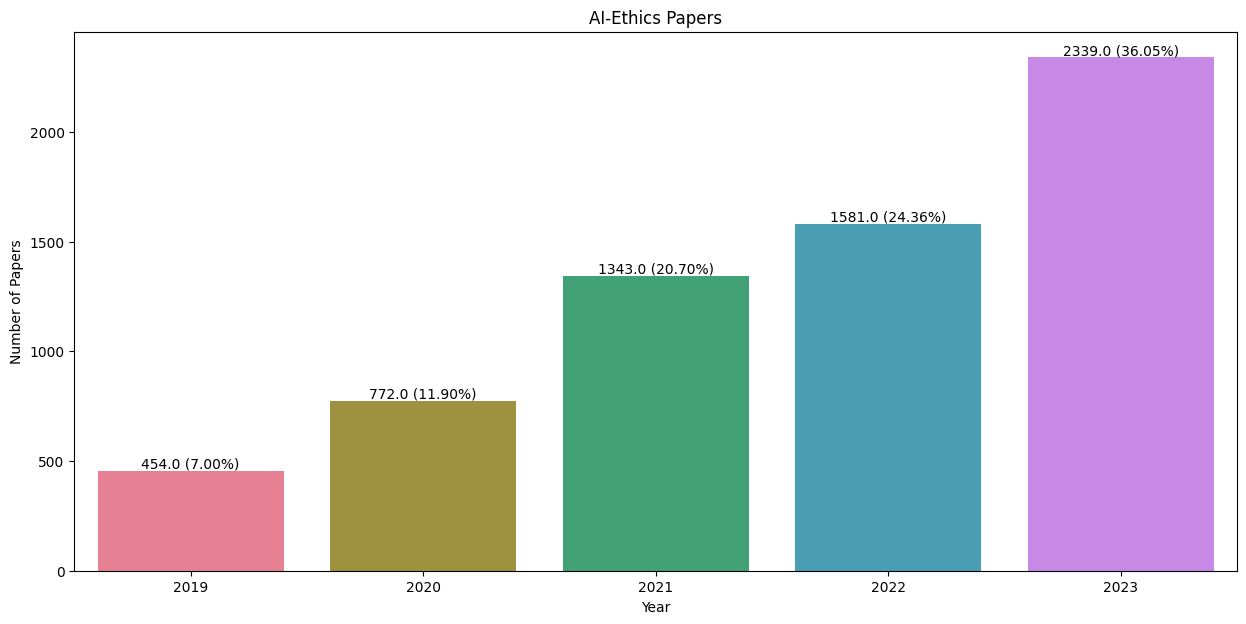

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Create the countplot
ax = sns.countplot(x=ai_ethics['update_date'].dt.year, palette="husl", order=ai_ethics['update_date'].dt.year.value_counts(ascending=True).index)

# Calculate absolute values for each category
abs_values = ai_ethics['update_date'].dt.year.value_counts(ascending=False)

# Loop through the bars and add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(ai_ethics) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the legend
plt.title('AI-Ethics Papers')
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

<ipython-input-20-819d47c234c0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_ethics['Category'] = 'AI-Ethics papers'


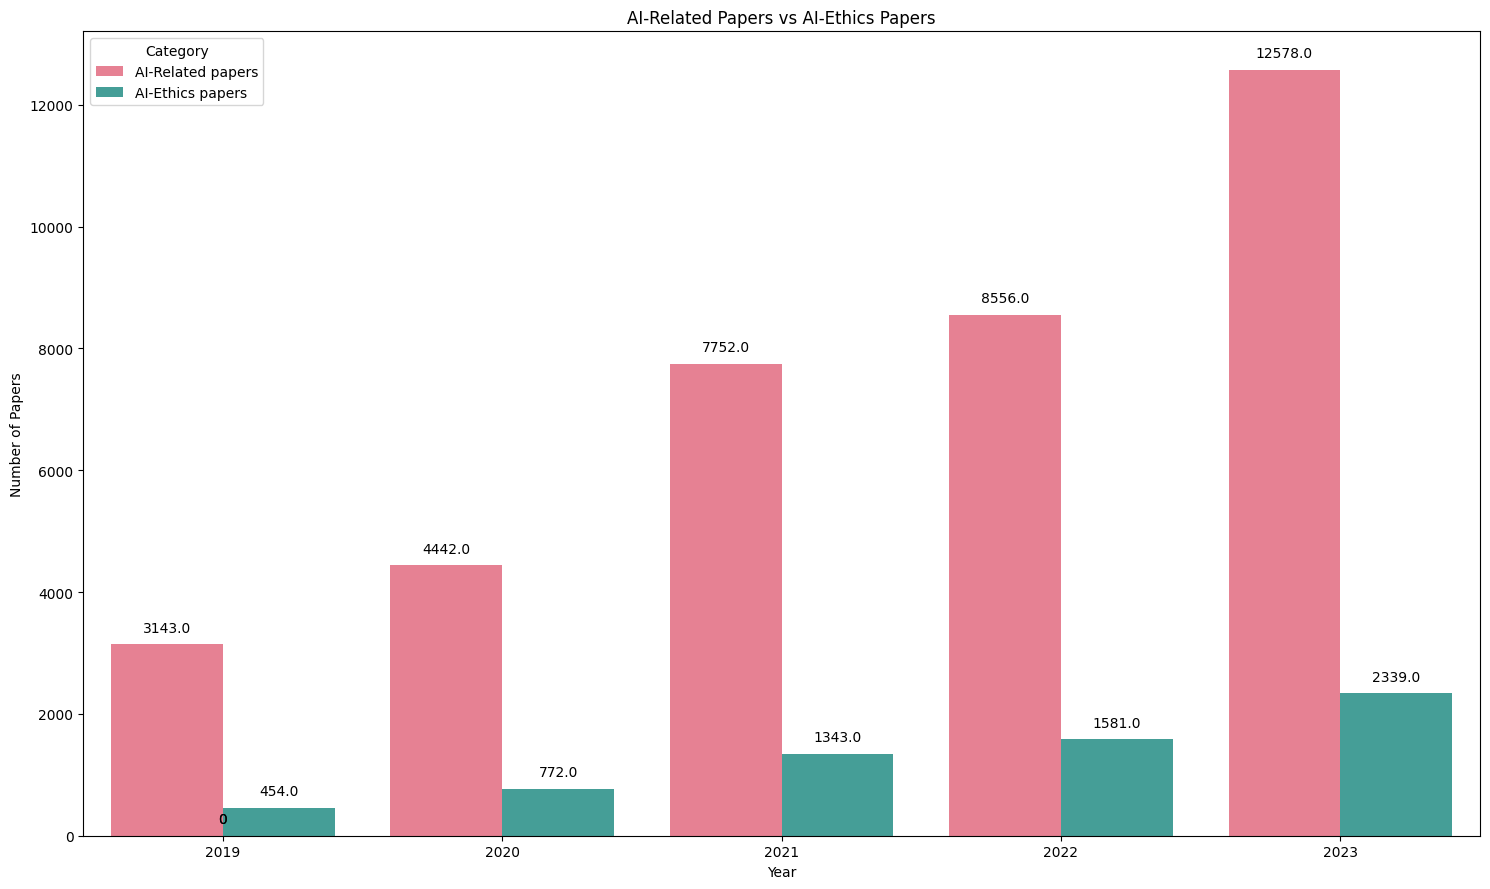

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 9))

# Combine the data
ai_arxiv_5years_df['Category'] = 'AI-Related papers'
ai_ethics['Category'] = 'AI-Ethics papers'
combined_data = pd.concat([ai_arxiv_5years_df, ai_ethics])

# Plot combined data
ax = sns.countplot(x=combined_data['update_date'].dt.year, hue=combined_data['Category'], palette="husl")

# Loop through the bars and add labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 12),
                textcoords="offset points",
                ha='center', va='center', fontsize=10, color='black')

plt.title('AI-Related Papers vs AI-Ethics Papers')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.legend(title='Category')

plt.tight_layout()
plt.show()

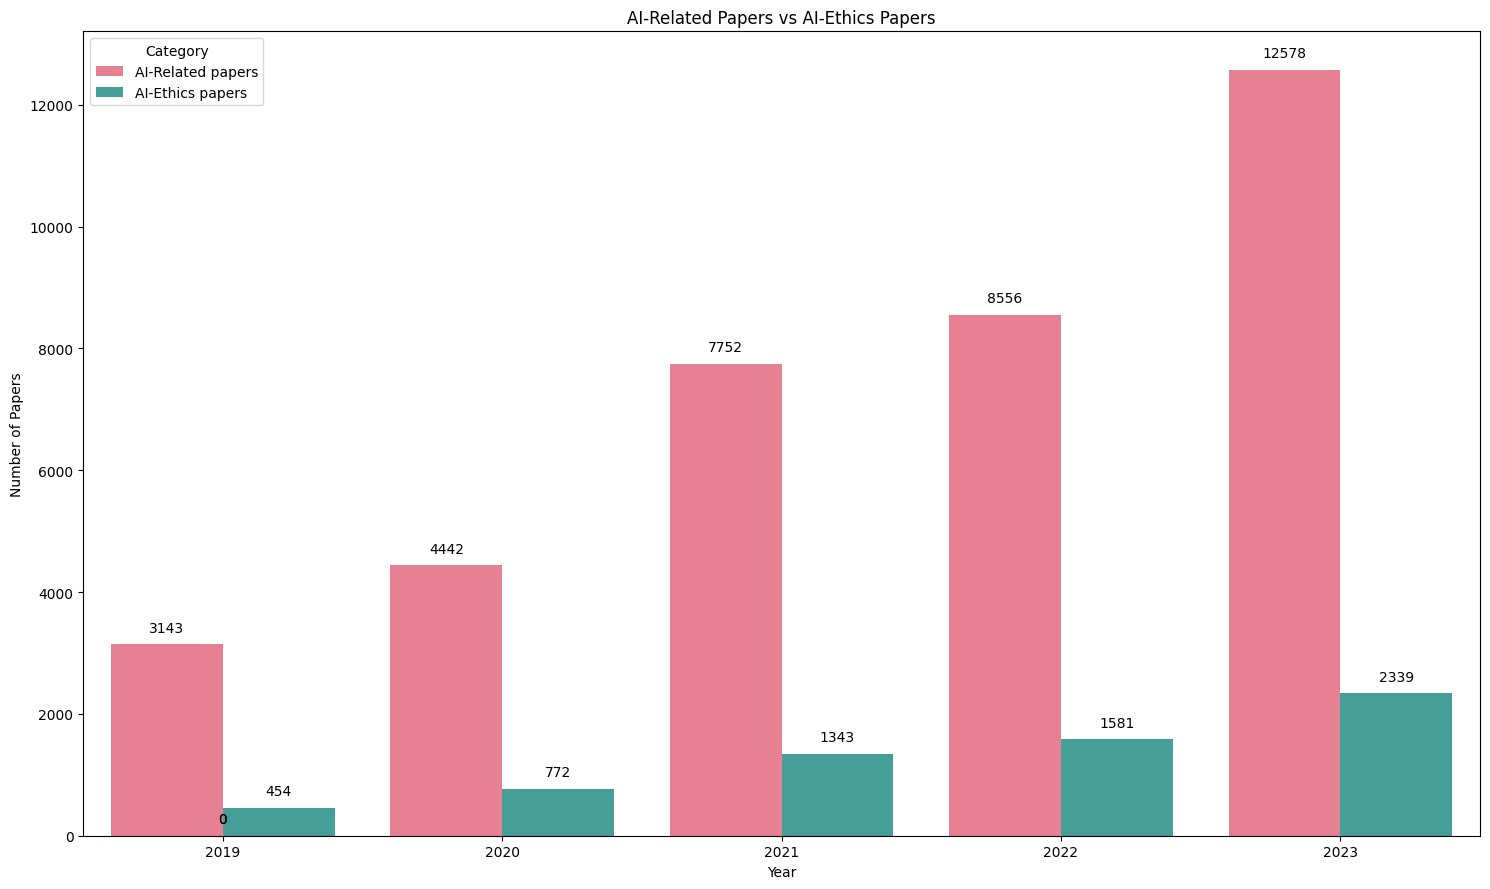

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 9))

# Combine the data
ai_arxiv_5years_df['Category'] = 'AI-Related papers'
ai_ethics_copy = ai_ethics.copy()
ai_ethics_copy['Category'] = 'AI-Ethics papers'
combined_data = pd.concat([ai_arxiv_5years_df, ai_ethics_copy])

# Plot combined data
ax = sns.countplot(x=combined_data['update_date'].dt.year, hue=combined_data['Category'], palette="husl")

# Loop through the bars and add labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 12),
                textcoords="offset points",
                ha='center', va='center', fontsize=10, color='black')

plt.title('AI-Related Papers vs AI-Ethics Papers')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.legend(title='Category')

plt.tight_layout()
plt.show()


In [ ]:
#ai_ethics.to_csv('drive/MyDrive/Colab Notebooks/arxiv_ai_ethics.csv', header=True, index=False)